In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

def load_jsonl(f):
    prefix = '../../../cc15-relevance-transfer/'
    df = pd.read_json(prefix + f, lines=True)
    threshold = 0.82

    df['urlMatches'] = df['urlMatches'] > 0
    df['urlMatchAndNearDuplicate'] = (df['urlMatches'] > 0) & (df['urlMaxS3Score'] >= threshold)
    df['nearDuplicate'] = df['maxNearDuplicateS3Score'] >= threshold
    df['nearDuplicateOrUrlDupl'] = (df['maxNearDuplicateS3Score'] >= threshold) | (df['urlMatchAndNearDuplicate'] == True)

    return df

df_2009 = load_jsonl('web-2009.jsonl')
df_2009['corpus'] = '2009'
df_2010 = load_jsonl('web-2010.jsonl')
df_2010['corpus'] = '2010'
df_2011 = load_jsonl('web-2011.jsonl')
df_2011['corpus'] = '2011'
df_2012 = load_jsonl('web-2012.jsonl')
df_2012['corpus'] = '2012'
df_2013 = load_jsonl('web-2013.jsonl')
df_2013['corpus'] = '2013'
df_2014 = load_jsonl('web-2014.jsonl')
df_2014['corpus'] = '2014'

df_all = pd.concat([df_2009, df_2010, df_2011, df_2012, df_2013, df_2014])

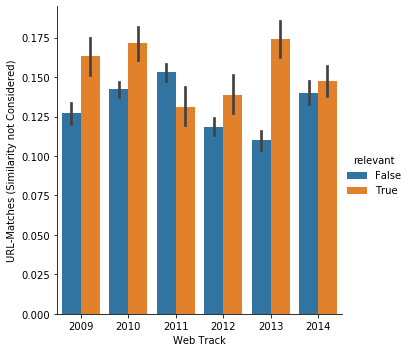

In [2]:
plt_all = sb.catplot(x='corpus', y='urlMatches', data=df_all, kind='bar', hue='relevant')
plt_all.set(ylabel='URL-Matches (Similarity not Considered)', xlabel='Web Track')

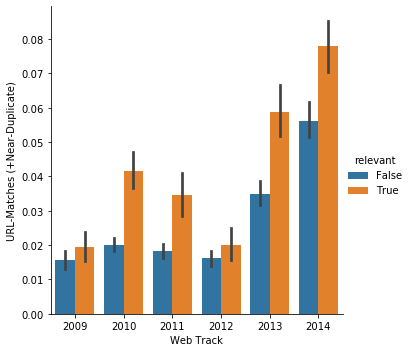

In [3]:
plt_all = sb.catplot(x='corpus', y='urlMatchAndNearDuplicate', data=df_all, kind='bar', hue='relevant')
plt_all.set(ylabel='URL-Matches (+Near-Duplicate)', xlabel='Web Track')

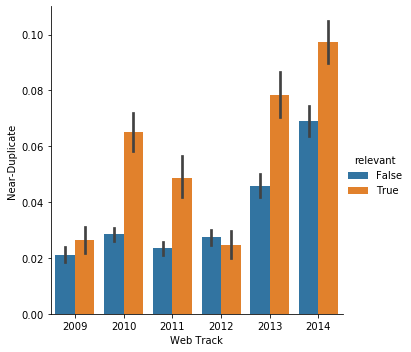

In [4]:
plt_all = sb.catplot(x='corpus', y='nearDuplicate', data=df_all, kind='bar', hue='relevant')
plt_all.set(ylabel='Near-Duplicate', xlabel='Web Track')

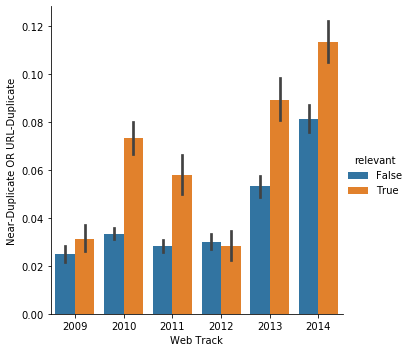

In [5]:
plt_all = sb.catplot(x='corpus', y='nearDuplicateOrUrlDupl', data=df_all, kind='bar', hue='relevant')
plt_all.set(ylabel='Near-Duplicate OR URL-Duplicate', xlabel='Web Track')